In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [ ]:
p = QuantumRegister(1, 'p')
q = QuantumRegister(1, 'q')
o = QuantumRegister(1, 'o')
pp = ClassicalRegister(1, "p'")
sum = ClassicalRegister(1, "q' = sum")
cout = ClassicalRegister(1, "o' = cout")
circ = QuantumCircuit(p, q, o, pp, sum, cout)

Put qubits `p` and `q` into superposition.  
By doing this they are at state `0` and `1` at the same time.

In [3]:
circ.h(p)
circ.h(q)
circ.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'p'), 0), Qubit(QuantumRegister(1, 'q'), 0), Qubit(QuantumRegister(1, 'o'), 0)), clbits=())

The summation of `p + q` can be mapped by the CCX (Controlled-CNOT) gate. The previous operation is analogous to an XOR operation over two bits.  
The target qubit is a scratch qubit initiliazed in the zero (`0`) state.  
To calculate the carry of the previous summation operate with a CX (Controlled-Not/Toffoli) gate.

In [4]:
circ.ccx(p, q, o)
circ.cx(p, q)
circ.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'p'), 0), Qubit(QuantumRegister(1, 'q'), 0), Qubit(QuantumRegister(1, 'o'), 0)), clbits=())

In [5]:
circ.measure(p, pp)
circ.measure(q, sum)
circ.measure(o, cout)

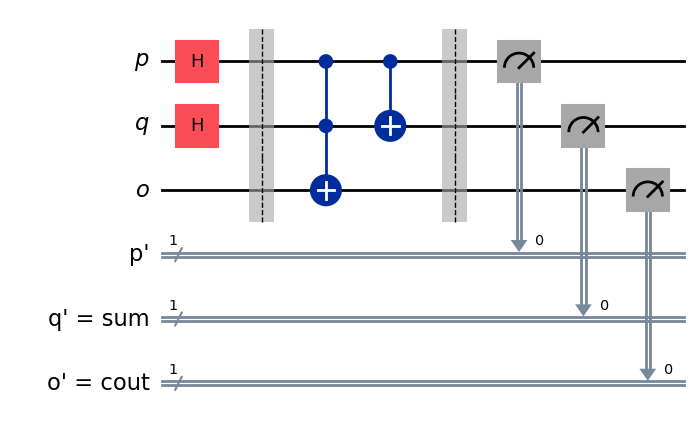

In [6]:
circ.draw('mpl')

In [7]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [8]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circ)
result = job.result()

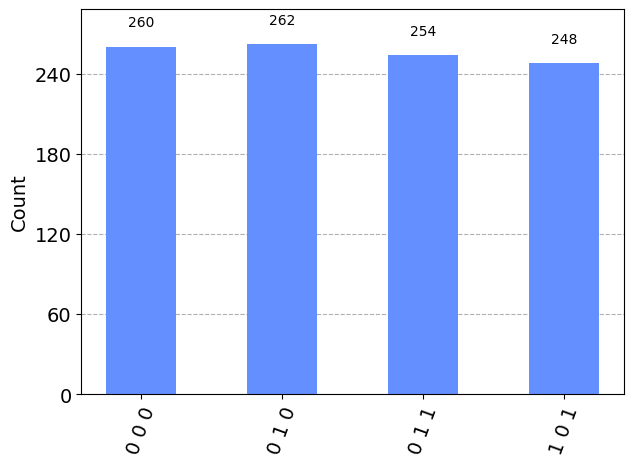

In [9]:
plot_histogram(result.get_counts())

| p | q | o | p' | q'=sum | o'=cout |
|:-:|:-:|:-:|:--:|:------:|:-------:|
| 0 | 0 | 0 |  0 |    0   |    0    |
| 0 | 1 | 0 |  0 |    1   |    0    |
| 1 | 0 | 0 |  1 |    1   |    0    |
| 1 | 1 | 0 |  1 |    0   |    0    |

The truth table of the half adder circuit.